# PTT Insurance版 關鍵字:南山 文字探勘
延續之前HW1~3做的南山人壽理賠及再購，這次我將從PTT Insurance版搜尋南山，看是否能從中獲取其他想法。希望能透過此次探勘，觀察到版友對於南山人壽的看法以及熱門商品等等線索。


## PTT Crawl
首先利用爬蟲技巧，將總共91頁的關鍵字"南山"的資料存為pickle檔，儲存在我的電腦裡面，便不用每次跑程式時，便要花時間爬資料下來。

In [2]:
#將ptt Insurance版的查詢"南山"的結果
import requests
from bs4 import BeautifulSoup

def pttcrawl(url):
    res = requests.get(url)
    response = res.text
    data = BeautifulSoup(response, 'html.parser')
    pagelist = (data.find_all(class_="r-ent"))
    alldata = []
    for item in pagelist:
        try:
            title = (item.find(class_='title').find('a').text)
        except:
            titile = 'None'
        try:
            author = (item.find(class_='meta').find(class_='author').text)
        except:
            author = 'NotFound'
        try:    
            url = (item.find(class_='title').find('a').get('href'))
        except:
            url = 'NotFound'
            
        listdata = {'title':title, 'author':author, 'url':url}
        alldata.append(listdata)
    return alldata #回傳一個list of dict

In [351]:
biglist = [] #裝各種不同page的大list

#總共91頁
for i in range(1,91):
    Url = 'https://www.ptt.cc/bbs/Insurance/search?page={}&q=%E5%8D%97%E5%B1%B1'.format(i)
    biglist.extend(pttcrawl(Url))

numberofdata_IN = (len(biglist))
print(numberofdata_IN)

# dump資料出來 
import pickle
with open('../Ptt_Insurance/pttcrawl_Nan.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(biglist, f)

1800


# 資料型態
觀察到我所爬取得資料有分三種作者、標題以及URL，我將利用URL進一步將文章裡面的內容爬取下來做分析

In [3]:
import pickle
with open('../Ptt_Insurance/pttcrawl_Nan.pkl', 'rb') as f:
    dataptt = pickle.load(f) #dataptt為一個a list of dictionary

import pandas as pd
pd.DataFrame(dataptt)

,author,title,url
0,basloilu,[意外/醫療] 32歲女 新保單檢視/南山,/bbs/Insurance/M.1556985859.A.07F.html
1,zack2808,[心得] 三商人壽 南山人壽 理賠超快速,/bbs/Insurance/M.1556867843.A.A05.html
2,WHungYun,[險種] 南山乙式車險請教,/bbs/Insurance/M.1556842393.A.5FC.html
3,libby2,[險種] 57歲女 新保單規劃/南山,/bbs/Insurance/M.1556678712.A.551.html
4,linalain15,[險種] 31歲女 既有保單檢視/南山,/bbs/Insurance/M.1556269857.A.219.html
5,refanna,[險種] 62歲男/60歲女 既有保單檢視/南山 想解約,/bbs/Insurance/M.1556017308.A.C2E.html
6,bloodeez,[醫療/重疾/壽險] 33歲男 既有保單檢視/南山,/bbs/Insurance/M.1556008678.A.6FE.html
7,flowra19230,[險種] 28歲女 新保單規劃/南山/富邦/台壽,/bbs/Insurance/M.1555990916.A.2A4.html
8,dag0055guy,[險種] 24歲女 新保單規劃/南山,/bbs/Insurance/M.1555661654.A.05A.html
9,annie830821,[險種] 25歲女 新保單規劃/南山,/bbs/Insurance/M.1555424093.A.1B3.html


## 觀察單一個URL網址


In [4]:
print(dataptt[0]['url'])
url1 = dataptt[0]['url']

/bbs/Insurance/M.1556985859.A.07F.html


### 透過URL和原始碼裡面的Elements欄目，將這篇文章的內容爬下來

In [5]:
#try to crawl content
import requests
from bs4 import BeautifulSoup

url = 'https://www.ptt.cc'+ url1
res = requests.get(url).text
data = BeautifulSoup(res, 'html.parser')

#print((data.find(id = "main-content").text))
print((data.find(id = "main-content").text))
#print(((data.find(id="main-content").find_all(class_="push")[1].find(class_="f1 hl push-tag")).text))

datatext = data.find(id = "main-content").text

作者basloilu (阿鼎)看板Insurance標題[險種] 意外險/醫療險  32女 南山新保單檢視時間Sun May  5 00:04:17 2019
一、性別： 女

二、年齡：32

三、職業/工作內容：

四、保障需求：意外>醫療>癌症

五、保費預算：20000/年

六、健康告知：
 （下列事項亦會於要保書詢問，參考作答即可，如認為自有體況涉及隱私，可不填）
 （按保險法第64條，隱匿/不實告知，可能會被保險公司解約：http://0rz.tw/8IOpS）
    (1) 最近２個月內是否曾因受傷或生病接受醫師治療、診療或用藥？no
    (2) 過去２年內是否曾因接受健康檢查有異常情形而被建議接受其他檢查或治療？no
    (3) 過去５年內是否曾因受傷或生病住院治療７日以上？no
    (4) 是否已確知懷孕？如是，已經幾週？計畫懷孕中
(4) 是否已確知懷孕？如是，已經幾週？（女性回答）
    (5) 過去５年內是否曾因患有下列疾病而接受醫師治療、診療或用藥？ no
        (心血管疾病/腦血管疾病/肺部疾病/肝臟疾病/腎臟疾病/甲狀腺疾病/精神疾病)
    (6) 過去１年內是否曾因患有下列疾病，而接受醫師治療、診療或用藥？no
        (胃部疾病/肝臟疾病/呼吸器官疾病/眼疾/婦女病)
    (7) 目前身體機能是否有失明、聾啞及言語、咀嚼、四肢機能障害？no
    (8)（成人）BMI 是否不在下列範圍：BMI＝16.5～28 no
       （兒童）生長曲線百分位 是否不在下列範圍：3%以上

七、常用交通工具： 機車

八、預計規劃：意外  醫療  癌症

九、現有保險： 無

十、預增保險：
保險公司：南山 (人情...)

商品名稱                          [英文代號]      保額/計畫   期間      保費
_____________________________________________________________________________
南山人壽樂健康祥定期健康保險         10TDD           60  萬     10年      2274
南山人壽新人身意外傷害保險附約         PAR          

### 先利用split將雜亂的文字檔初步切成一句一句

In [6]:
sentences = datatext.split()
print(sentences[70])
print("Number of sentences: %d" % len(sentences))

南山人壽新傷害醫療保險金附加條款
Number of sentences: 149


### 這邊可以看到jieba在斷詞時仍有些微缺陷，像是"南山人壽新傷害醫療保險金附加條款"，應該是 "南山"、"人壽"、"新"、"傷害"……

In [8]:
import jieba
import jieba.posseg
print(list(jieba.cut(sentences[70])))
print(list(jieba.posseg.cut(sentences[70])))

['南山', '人壽新', '傷害', '醫療', '保險金', '附加', '條款']
[pair('南山', 'ns'), pair('人壽', 'n'), pair('新', 'a'), pair('傷害', 'a'), pair('醫療', 'n'), pair('保險', 'n'), pair('金', 'n'), pair('附加', 'v'), pair('條款', 'n')]


### 這邊將所有sentence全部交給jieba斷詞後，計算每個單字出現的頻率。可以觀察到無清洗的資料充滿標點符號，以下做標點符號的去除。

In [9]:
from collections import Counter
word_counts = Counter()
for sentence in sentences:
    for word in jieba.cut(sentence):
        word_counts[word] += 1
print(word_counts.most_common(20))

[('/', 29), (':', 19), ('、', 17), ('，', 17), ('(', 14), (')', 14), ('：', 14), ('年', 12), ('？', 11), ('疾病', 11), ('05', 11), ('保險', 10), ('是否', 10), ('。', 9), ('南山', 8), ('1', 8), ('.', 7), ('或', 7), ('no', 7), ('醫療', 6)]


### 去除完標點符號後，繼續觀察字詞頻率，常見的stopword充斥在前幾名，並無法呈現資料想表達的意思。匯入網路上繁體中文的stopword，進行第二次的資料清洗。

In [10]:
import unicodedata

from collections import Counter
word_counts = Counter()
for sentence in sentences:
    for word in jieba.cut(sentence):
        if len(word) > 1 or not unicodedata.category(word).startswith('P'): #不同字有不同的分類 ex. P
            word_counts[word] += 1
print(word_counts.most_common(30))

[('年', 12), ('疾病', 11), ('05', 11), ('保險', 10), ('是否', 10), ('南山', 8), ('1', 8), ('或', 7), ('no', 7), ('醫療', 6), ('的', 6), ('意外', 5), ('00', 5), ('健康', 5), ('下列', 5), ('內', 5), ('曾', 5), ('因', 5), ('接受', 5), ('治療', 5), ('住院', 5), ('文章', 5), ('32', 4), ('過去', 4), ('有', 4), ('人情', 4), ('附約', 4), ('附加', 4), ('給付', 4), ('→', 4)]


In [11]:
#匯入網路上的繁體字stopwords
with open('stopwords.txt','r', encoding='UTF-8') as stop:
    text = stop.read()
stopword = text.split("\n")

### 做完清洗以後，常用單字面便可以約略看出該篇文章的主題，像是"南山"、"醫療"、"人情"、"醫療險"等等字詞。接下來便進行全部文章的字詞頻率分析。

In [12]:
from collections import Counter
word_counts = Counter()
for sentence in sentences:
    for word in jieba.cut(sentence):
        if word in stopword:
            continue
        if len(word) > 1 or not unicodedata.category(word).startswith('P'):
            word_counts[word] += 1
print(word_counts.most_common(30))

[('年', 12), ('疾病', 11), ('南山', 8), ('no', 7), ('醫療', 6), ('意外', 5), ('健康', 5), ('曾', 5), ('接受', 5), ('治療', 5), ('住院', 5), ('文章', 5), ('32', 4), ('過去', 4), ('人情', 4), ('附約', 4), ('附加', 4), ('給付', 4), ('公司', 3), ('醫師', 3), ('診療', 3), ('用藥', 3), ('萬', 3), ('傷害', 3), ('條款', 3), ('元', 3), ('Insurance', 2), ('險種', 2), ('醫療險', 2), ('女', 2)]


## 進行全部文章的字詞頻率分析

### 將每篇文章的內容儲存在pttcrawl_content.pkl裡面，以便於接下來使用。

In [475]:
totalcontent = []
for data in dataptt:
    url1 = data['url']
    url2 = 'https://www.ptt.cc'+ str(url1)
    res2 = requests.get(url2).text
    data2 = BeautifulSoup(res, 'html.parser')    
    try:
        datatext2 = data.find(id = "main-content").text
    except:
        datatext2 = 'NotFound'
    totalcontent.append(datatext2)

# dump資料出來 
import pickle
with open('../Ptt_Insurance/pttcrawl_content.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(totalcontent, f)
print(len(totalcontent))

1800


In [14]:
import pickle
with open('../Ptt_Insurance/pttcrawl_content.pkl', 'rb') as f:
    alldata = pickle.load(f) #dataptt為一個a list of dictionary
sumlist = []
allcounter = Counter()
for i in alldata:
    sentences = i.split()
    word_counts = Counter()
    for sentence in sentences:
        for word in jieba.cut(sentence):
            if word in stopword:
                continue
            if len(word) > 1 or not unicodedata.category(word).startswith('P'):
                word_counts[word] += 1
    word1 = word_counts
    allcounter = allcounter + word1
alldata = dict(allcounter.most_common())
print(allcounter.most_common(200))

[('南山', 14454), ('醫療', 8561), ('10', 7864), ('附約', 7676), ('20', 7257), ('年', 7163), ('11', 6782), ('12', 6726), ('意外', 6468), ('萬', 6330), ('23', 5785), ('人壽', 5444), ('元', 5272), ('beriaura', 5210), ('終身', 4895), ('22', 4891), ('推', 4737), ('保費', 4724), ('傷害', 4641), ('保單', 4459), ('疾病', 4332), ('21', 4180), ('15', 4168), ('住院', 4145), ('健康', 3685), ('規劃', 3524), ('買', 3521), ('14', 3486), ('說', 3471), ('公司', 3465), ('16', 3396), ('保障', 3262), ('17', 3248), ('18', 3151), ('27', 3067), ('13', 2993), ('19', 2953), ('cc', 2771), ('歲', 2760), ('30', 2749), ('ptt', 2730), ('請', 2717), ('時間', 2655), ('保額', 2602), ('Insurance', 2579), ('實支', 2567), ('手術', 2558), ('建議', 2509), ('險', 2484), ('條款', 2480), ('定期', 2454), ('商品', 2449), ('好', 2428), ('計畫', 2325), ('給付', 2181), ('後', 2140), ('萬元', 2136), ('壽險', 2109), ('站', 2030), ('24', 2029), ('附加', 2017), ('25', 2016), ('28', 1981), ('想', 1972), ('批', 1968), ('26', 1934), ('踢踢', 1919), ('實業坊', 1917), ('人', 1916), ('發信', 1916), ('29', 1835), ('目前

### 由下圖可以觀察到全部文章在做中文斷詞，沒有處理到數字、常出現卻無意義的詞，導致文章關鍵字無法被主題性顯示。

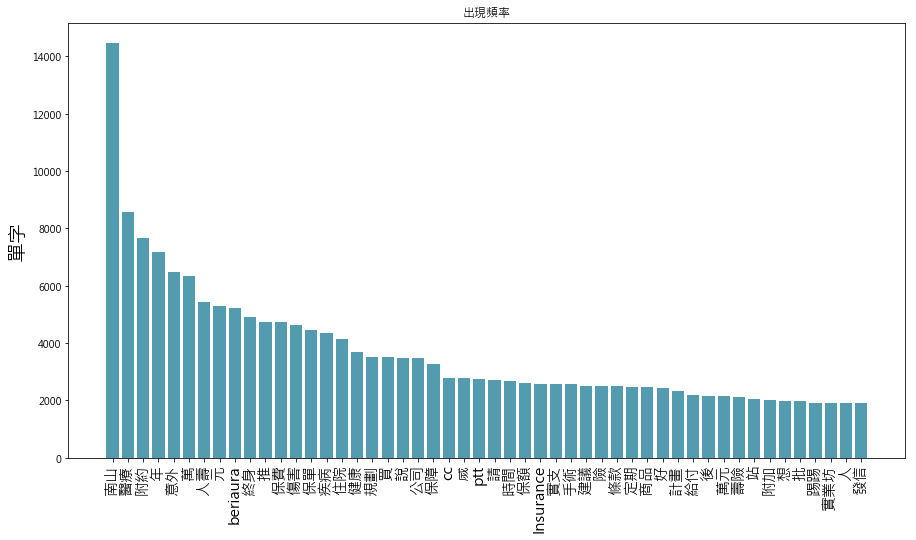

In [479]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from collections import Counter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

def barplot(x_data, y_data, x_label="", y_label="", title=""):
    font = font_manager.FontProperties(fname='msjh.ttc',weight='bold',style='normal', size=16)
    plt.figure(figsize = (15,8))
    ax = plt.subplot(1,1,1)
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # to remove line between points
    ax.set_ylabel(y_label, fontproperties = font, fontsize = 20)
    ax.set_xlabel(x_label, fontproperties = font, fontsize = 20)
    ax.set_xticklabels(x_data,fontproperties = font, rotation = 90, fontsize = 15)
    ax.set_title(title)

barplot((dict(allcounter.most_common(50))).keys(),(dict(allcounter.most_common(50))).values(), y_label = "單字", title = "出現頻率")

### 因此這邊手動加入在排名前面卻無意義的詞，如批踢踢、實業坊這種本來就會出現在網頁裡面的詞。

In [500]:
stopword.extend(['ptt','Insurance','cc','批','踢踢','實業坊','站','作者','看板','說','歲','請','發信'])

In [501]:
import pickle
with open('../Ptt_Insurance/pttcrawl_content.pkl', 'rb') as f:
    alldata = pickle.load(f) #dataptt為一個a list of dictionary
sumlist = []
allcounter = Counter()
for i in alldata:
    sentences = i.split()
    word_counts = Counter()
    for sentence in sentences:
        for word in jieba.cut(sentence):
            if word in stopword:
                continue
            if len(word) > 1 or not unicodedata.category(word).startswith('P'):
                word_counts[word] += 1
    word1 = word_counts
    allcounter = allcounter + word1
alldata = dict(allcounter.most_common())

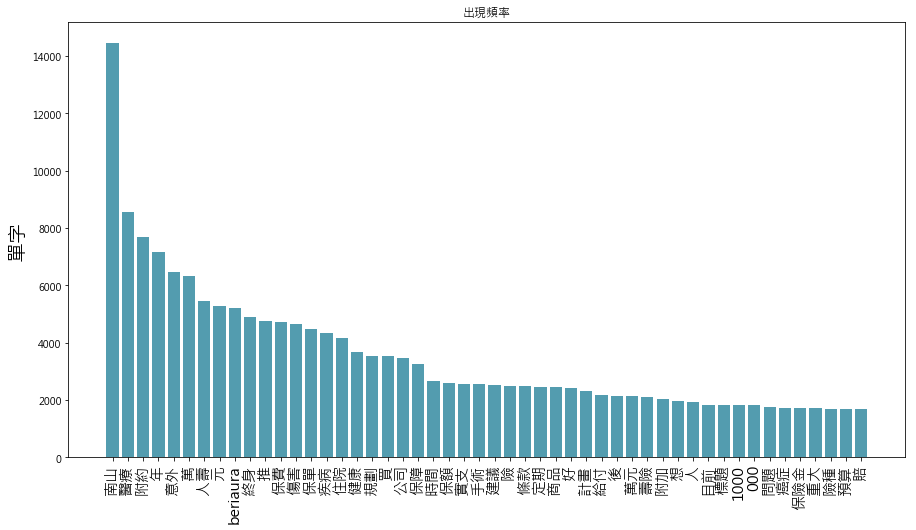

In [502]:
barplot((dict(allcounter.most_common(50))).keys(),(dict(allcounter.most_common(50))).values(), y_label = "單字", title = "出現頻率")

### 最後透過Word Cloud將文字頻率精美的呈現出來！

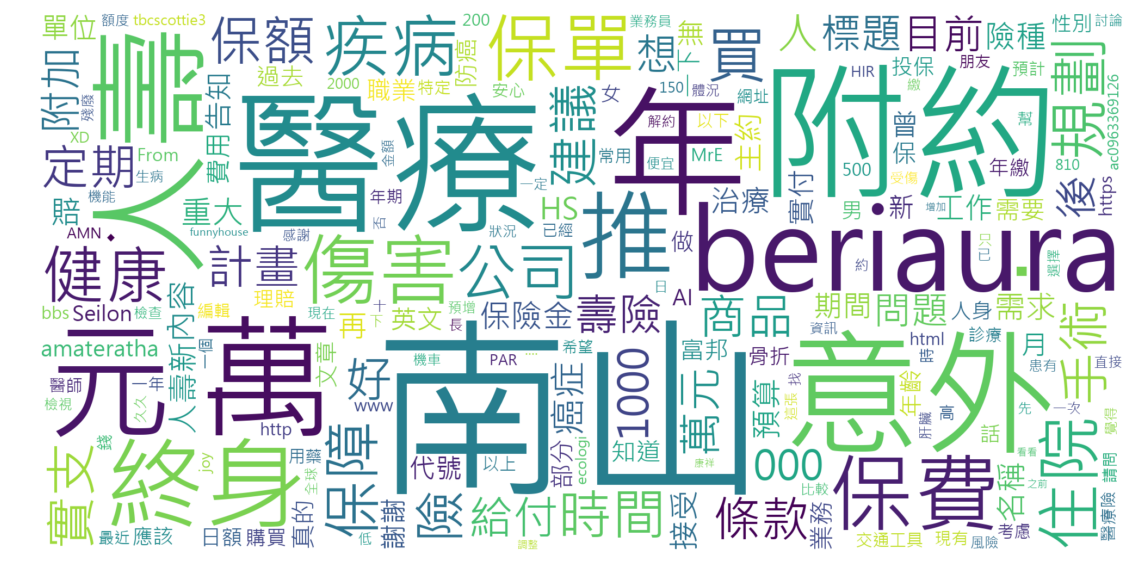

In [503]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
font = r'msjh.ttc'
#mask = np.array(Image.open(r"unnamed.jpg"))
my_wordcloud = WordCloud(
    background_color="white",
    font_path=font,
    collocations=False,
    width = 2000,
    height = 1000,
    margin = 10
).generate_from_frequencies(frequencies = alldata)
plt.figure( figsize=(20,10), facecolor='w')
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# 小結
* 高頻率字裡面前幾名便有"終身"，可見南山人壽終身醫療保險，在於Ptt Insurance上有許多人購買及討論，值得南山人壽觀察的商品。
* 雖然沒有在50大裡面，大概在60~70名左右有"富邦"出現人數為1168次，推測在版上南山和富邦常被拿來比較。
* 最為有趣的是"beriaura"，此單字出現頻率非常之高，可以說是該版友在南山的每一篇文章都有留言，才有機會在佔這麼多的次數。經上網一查才發現beriaura為南山保險業務員，或許是他熱心助人等等，不做更多評斷。 附上連結: [網址](https://www.ptt.cc/bbs/Insurance/M.1366789666.A.D59.html)
* 前50裡面也包含單字"好"，但是"好"不能確定是否為對南山的正面評價，因為"不夠好"、"不好"、"太好"都有可能是"好"的來源